In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
#Loss_df =pd.read_csv('/Users/jihwanlim/Desktop/Heatmap_Loss.csv',index_col='Model')
AP_df = pd.read_csv('/Users/jihwanlim/Desktop/Final_Result/Heatmap.csv',index_col='Model') # Manually curated file

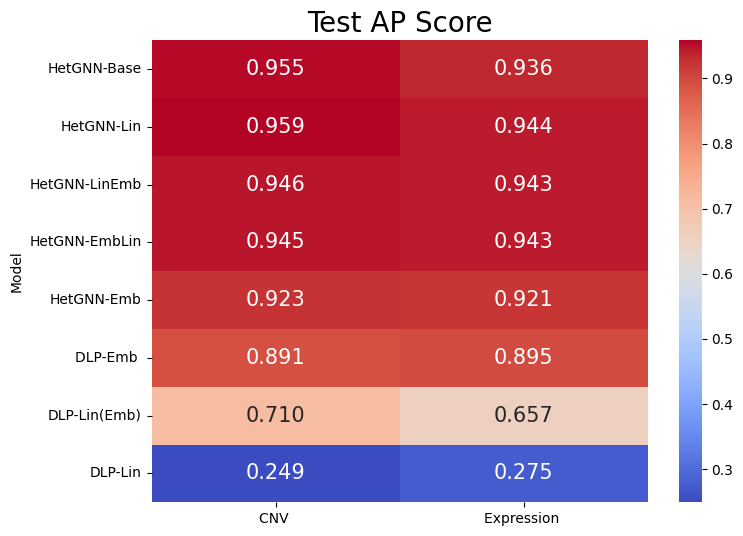

In [56]:
# 2.2
plt.figure(figsize=(8, 6))  # You can adjust the dimensions as needed

sns.heatmap(AP_df, annot=True, fmt='.3f', cmap='coolwarm', annot_kws={"size": 15})
plt.title('Test AP Score', fontsize=20)
plt.show()


In [4]:
def data_roader(file):
    data = pd.read_csv(file)
    columns_to_drop = [col for col in data.columns if '__MIN' in col or '__MAX' in col] # Remove unnecessary columns from WandB files
    data_cleaned = data.drop(columns=columns_to_drop)
    data_cleaned.columns = [col.split(' -')[0].strip() for col in data_cleaned.columns]
    data_cleaned.drop(['Step'],axis=1, inplace=True)

    return data_cleaned

def concater(gene_feat):
    testAP = data_roader(f'/Users/jihwanlim/Desktop/Final_Result/WandB/{gene_feat}_testAP.csv')
    ckpt = data_roader(f'/Users/jihwanlim/Desktop/Final_Result/WandB/{gene_feat}_CKPT.csv')
    AssayAP = data_roader(f'/Users/jihwanlim/Desktop/Final_Result/WandB/{gene_feat}_AssayAP.csv')
    GeneAP = data_roader(f'/Users/jihwanlim/Desktop/Final_Result/WandB/{gene_feat}_GeneAP.csv')   

    ckpt_dict = {}
    for i in range(len(ckpt.columns)):
        ckpt_dict[ckpt.columns[i]] = ckpt.iloc[0,i]
    
    assay_dict = {}
    for i in range(len(AssayAP.columns)):
        model_name = AssayAP.columns[i]
        assay_dict[model_name] = AssayAP.iloc[ckpt_dict[model_name],i]
    
    gene_dict = {}
    for i in range(len(GeneAP.columns)):
        model_name = GeneAP.columns[i]
        gene_dict[model_name] = GeneAP.iloc[ckpt_dict[model_name],i]

    final_df = pd.concat([testAP, pd.DataFrame([assay_dict]), pd.DataFrame([gene_dict])])
    final_df.index = ['TestAP', 'AssayAP', 'GeneAP']

    base_df = final_df.iloc[:,0:3]
    base_df['Mean'] = base_df.apply(lambda row: np.mean(row), axis=1)
    base_df['Stdev'] = base_df.apply(lambda row: np.std(row), axis=1)

    for i in range(3,len(final_df.columns),3):
        tem_df = final_df.iloc[:,i:i+3]
        tem_df['Mean'] = tem_df.apply(lambda row: np.mean(row), axis=1)
        tem_df['Stdev'] = tem_df.apply(lambda row: np.std(row), axis=1)

        base_df = pd.concat([base_df, tem_df], axis=1)
    
    base_df.to_csv(f'/Users/jihwanlim/Desktop/Final_Result/{gene_feat}.csv')
    return base_df

In [52]:
go = concater('go')
cgp = concater('cgp')
bp = concater('bp')
cp = concater('cp')

gene_rnd = concater('gene_rnd')

Gene_Empty = concater('Gene_Empty')
Cell_Empty = concater('Cell_Empty')

Cell_Empty_Lin = concater('Cell_Empty_Lin')

/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_41489/2693677370.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df['Mean'] = base_df.apply(lambda row: np.mean(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_41489/2693677370.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df['Stdev'] = base_df.apply(lambda row: np.std(row), axis=1)
/var/folders/9b/h4yb7lq93159q0tlmdjvm0780000gn/T/ipykernel_41489/2693677370.py:39: SettingWithCopyWarning: 
A value is try

In [5]:
cgp = pd.read_csv('/Users/jihwanlim/Desktop/Final_Result/cgp.csv',header=0,index_col=0)
go =pd.read_csv('/Users/jihwanlim/Desktop/Final_Result/go.csv',header=0,index_col=0)
cp =pd.read_csv('/Users/jihwanlim/Desktop/Final_Result/cp.csv',header=0,index_col=0)
bp =pd.read_csv('/Users/jihwanlim/Desktop/Final_Result/bp.csv',header=0,index_col=0)
gene_rnd =pd.read_csv('/Users/jihwanlim/Desktop/Final_Result/gene_rnd.csv',header=0,index_col=0)

Gene_Empty =pd.read_csv('/Users/jihwanlim/Desktop/Final_Result/Gene_Empty.csv',header=0,index_col=0)
Cell_Empty =pd.read_csv('/Users/jihwanlim/Desktop/Final_Result/Cell_Empty.csv',header=0,index_col=0)
Cell_Empty_Lin =pd.read_csv('/Users/jihwanlim/Desktop/Final_Result/Cell_Empty_Lin.csv',header=0,index_col=0)

In [6]:
testAP_dict = {}
AssayAP_dict = {}
GeneAP_dict = {}

testAP_dict_lin = {}
AssayAP_dict_lin = {}
GeneAP_dict_lin = {}

gene_feat_list = [cgp,cp,go,bp]

gene_feat_list_str = ['_CGP','_CP','_GO','_BP']

for ind, gene_feat in enumerate(gene_feat_list):
    for i in range(0,len(gene_feat.columns),5):
        index = i + 3
        items = gene_feat.columns[i].split('_')[1:-1]
        modelname = '_'.join(items) + gene_feat_list_str[ind]

        testAP_dict[modelname] = gene_feat.iloc[0,index]
        GeneAP_dict[modelname] = gene_feat.iloc[2,index]
        AssayAP_dict[modelname] = gene_feat.iloc[1,index]

In [7]:
# Reformatting the dictionary into a list of dictionaries
def reformat_data(data):
    reformatted = []
    for key, value in data.items():
        parts = key.rsplit('_', 1)
        if len(parts) == 2:
            cell, gene = parts
            reformatted.append({'cell_feat': cell, 'gene_feat': gene, 'value': value})
        else:
            print(f"Unexpected key format: {key}")

    df = pd.DataFrame(reformatted)
    df_final = df.pivot(index='gene_feat', columns='cell_feat', values='value')

    return df_final

testAP_df = reformat_data(testAP_dict)
AssayAP_df = reformat_data(AssayAP_dict)
GeneAP_df = reformat_data(GeneAP_dict)

new_order = ['cnv_soft', 'cnv', 'expression',  'cnv_soft_expression', 'expression_cnv_soft', 'cnv_expression', 'expression_cnv', 'cnv_full','expression_full', 'cnv_soft_rnd', 'cnv_rnd', 'expression_rnd']
testAP_df = testAP_df[new_order]
AssayAP_df = AssayAP_df[new_order]
GeneAP_df = GeneAP_df[new_order]

testAP_df.columns = ['CNV', 'CNV_Hard', 'Expression',  'CNV_Expression', 'Expression_CNV', 'CCNV_Hard_expression', 'Expression_CNV_Hard', 'CNV_Full','Expression_Full', 'CNV_Rnd', 'CNV_Hard_Rnd', 'Expression_Rnd']
AssayAP_df.columns = ['CNV', 'CNV_Hard', 'Expression',  'CNV_Expression', 'Expression_CNV', 'CCNV_Hard_expression', 'Expression_CNV_Hard', 'CNV_Full','Expression_Full', 'CNV_Rnd', 'CNV_Hard_Rnd', 'Expression_Rnd']
GeneAP_df.columns = ['CNV', 'CNV_Hard', 'Expression',  'CNV_Expression', 'Expression_CNV', 'CCNV_Hard_expression', 'Expression_CNV_Hard', 'CNV_Full','Expression_Full', 'CNV_Rnd', 'CNV_Hard_Rnd', 'Expression_Rnd']


new_order2 = ['CGP', 'CP', 'GO', 'BP']
testAP_df = testAP_df.reindex(new_order2)
AssayAP_df = AssayAP_df.reindex(new_order2)
GeneAP_df = GeneAP_df.reindex(new_order2)

In [8]:
testAP_df

,CNV,CNV_Hard,Expression,CNV_Expression,Expression_CNV,CCNV_Hard_expression,Expression_CNV_Hard,CNV_Full,Expression_Full,CNV_Rnd,CNV_Hard_Rnd,Expression_Rnd
gene_feat,,,,,,,,,,,,
CGP,0.954929,0.950309,0.935953,0.945715,0.940129,0.940843,0.942508,0.921618,0.923103,0.918215,0.896742,0.920123
CP,0.946426,0.950192,0.932103,0.940063,0.941279,0.944482,0.940666,0.916528,0.904352,0.923579,0.882110,0.921258
GO,0.945761,0.946944,0.941861,0.946599,0.950536,0.945118,0.943661,0.930782,0.931499,0.913689,0.904915,0.925967
BP,0.950551,0.946682,0.937305,0.944575,0.941192,0.946055,0.942044,0.923261,0.925021,0.928765,0.888336,0.925967


In [9]:
testAP_df.to_csv('/Users/jihwanlim/Desktop/Final_Result/testAP.csv')
AssayAP_df.to_csv('/Users/jihwanlim/Desktop/Final_Result/AssayAP.csv')
GeneAP_df.to_csv('/Users/jihwanlim/Desktop/Final_Result/GeneAP.csv')

In [9]:
Gene_Empty_testAP_dict = {}
Gene_Empty_GeneAP_dict = {}
Gene_Empty_AssayAP_dict = {}

for i in range(0,len(Gene_Empty.columns),5):
    index = i + 3
    items = Gene_Empty.columns[i].split('_')[1:-1]
    modelname = '_'.join(items) + '_GeneEmpty'

    Gene_Empty_testAP_dict[modelname] = Gene_Empty.iloc[0,index]
    Gene_Empty_GeneAP_dict[modelname] = Gene_Empty.iloc[2,index]
    Gene_Empty_AssayAP_dict[modelname] = Gene_Empty.iloc[1,index]

Gene_Empty_testAP_df = reformat_data(Gene_Empty_testAP_dict)
Gene_Empty_GeneAP_df = reformat_data(Gene_Empty_GeneAP_dict)
Gene_Empty_AssayAP_df = reformat_data(Gene_Empty_AssayAP_dict)

new_order = ['cnv_soft', 'cnv', 'expression', 'cnv_expression', 'expression_cnv']
Gene_Empty_testAP_df = Gene_Empty_testAP_df[new_order]
Gene_Empty_GeneAP_df = Gene_Empty_GeneAP_df[new_order]
Gene_Empty_AssayAP_df = Gene_Empty_AssayAP_df[new_order]

Gene_Empty_testAP_df.columns = ['CNV', 'CNV_Hard', 'Expression', 'CNV_Hard_expression', 'Expression_CNV_Hard']
Gene_Empty_GeneAP_df.columns = ['CNV', 'CNV_Hard', 'Expression', 'CNV_Hard_expression', 'Expression_CNV_Hard']
Gene_Empty_AssayAP_df.columns = ['CNV', 'CNV_Hard', 'Expression', 'CNV_Hard_expression', 'Expression_CNV_Hard']

Gene_Empty_testAP_df.rename(index={'GeneEmpty': 'Gene_Empty'}, inplace=True)
Gene_Empty_GeneAP_df.rename(index={'GeneEmpty': 'Gene_Empty'}, inplace=True)
Gene_Empty_AssayAP_df.rename(index={'GeneEmpty': 'Gene_Empty'}, inplace=True)

In [58]:
Gene_Empty_testAP_df

,CNV,CNV_Hard,Expression,CNV_Hard_expression,Expression_CNV_Hard
gene_feat,,,,,
Gene_Empty,0.938688,0.929262,0.923025,0.930687,0.931216


In [10]:
Cell_Empty_testAP_dict = {}
Cell_Empty_GeneAP_dict = {}
Cell_Empty_AssayAP_dict = {}

for i in range(0,len(Cell_Empty.columns),5):
    index = i + 3
    items = Cell_Empty.columns[i].split('_')[1:-1]
    modelname = 'Cell_Empty_' + '_'.join(items).upper()

    Cell_Empty_testAP_dict[modelname] = Cell_Empty.iloc[0,index]
    Cell_Empty_GeneAP_dict[modelname] = Cell_Empty.iloc[2,index]
    Cell_Empty_AssayAP_dict[modelname] = Cell_Empty.iloc[1,index]

Cell_Empty_testAP_df = reformat_data(Cell_Empty_testAP_dict)
Cell_Empty_GeneAP_df = reformat_data(Cell_Empty_GeneAP_dict)
Cell_Empty_AssayAP_df = reformat_data(Cell_Empty_AssayAP_dict)

new_order = ['CGP', 'CP', 'GO', 'BP']
Cell_Empty_testAP_df = Cell_Empty_testAP_df.reindex(new_order)
Cell_Empty_GeneAP_df = Cell_Empty_GeneAP_df.reindex(new_order)
Cell_Empty_AssayAP_df = Cell_Empty_AssayAP_df.reindex(new_order)

In [11]:
Cell_Empty_Lin_testAP_dict = {}
Cell_Empty_Lin_GeneAP_dict = {}
Cell_Empty_Lin_AssayAP_dict = {}

for i in range(0,len(Cell_Empty_Lin.columns),5):
    index = i + 3
    items = Cell_Empty_Lin.columns[i].split('_')[1:-1]
    modelname = 'Cell_Empty_Lin_' + '_'.join(items).upper()

    Cell_Empty_Lin_testAP_dict[modelname] = Cell_Empty_Lin.iloc[0,index]
    Cell_Empty_Lin_GeneAP_dict[modelname] = Cell_Empty_Lin.iloc[2,index]
    Cell_Empty_Lin_AssayAP_dict[modelname] = Cell_Empty_Lin.iloc[1,index]

Cell_Empty_Lin_testAP_df = reformat_data(Cell_Empty_Lin_testAP_dict)
Cell_Empty_Lin_GeneAP_df = reformat_data(Cell_Empty_Lin_GeneAP_dict)
Cell_Empty_Lin_AssayAP_df = reformat_data(Cell_Empty_Lin_AssayAP_dict)

new_order = ['CGP', 'CP', 'GO', 'BP']
Cell_Empty_Lin_testAP_df = Cell_Empty_Lin_testAP_df.reindex(new_order)
Cell_Empty_Lin_GeneAP_df = Cell_Empty_Lin_GeneAP_df.reindex(new_order)
Cell_Empty_Lin_AssayAP_df = Cell_Empty_Lin_AssayAP_df.reindex(new_order)

In [13]:
Cell_Empty_testAP_df.to_csv('/Users/jihwanlim/Desktop/Final_Result/Cell_Empty_testAP.csv')
Cell_Empty_GeneAP_df.to_csv('/Users/jihwanlim/Desktop/Final_Result/Cell_Empty_AssayAP.csv')
Cell_Empty_AssayAP_df.to_csv('/Users/jihwanlim/Desktop/Final_Result/Cell_Empty_GeneAP.csv')

In [12]:
gene_rnd_testAP_dict = {}
gene_rnd_GeneAP_dict = {}
gene_rnd_AssayAP_dict = {}

for i in range(0,len(gene_rnd.columns),5):
    index = i + 3
    items = gene_rnd.columns[i].split('_')[1:-1]
    modelname = '_'.join(items) + '_GeneRND'

    gene_rnd_testAP_dict[modelname] = gene_rnd.iloc[0,index]
    gene_rnd_GeneAP_dict[modelname] = gene_rnd.iloc[2,index]
    gene_rnd_AssayAP_dict[modelname] = gene_rnd.iloc[1,index]

gene_rnd_testAP_df = reformat_data(gene_rnd_testAP_dict)
gene_rnd_GeneAP_df = reformat_data(gene_rnd_GeneAP_dict)
gene_rnd_AssayAP_df = reformat_data(gene_rnd_AssayAP_dict)

new_order = ['cnv_soft', 'cnv', 'expression']
gene_rnd_testAP_df = gene_rnd_testAP_df[new_order]
gene_rnd_GeneAP_df = gene_rnd_GeneAP_df[new_order]
gene_rnd_AssayAP_df = gene_rnd_AssayAP_df[new_order]

gene_rnd_testAP_df.columns = ['CNV', 'CNV_Hard', 'Expression']
gene_rnd_GeneAP_df.columns = ['CNV', 'CNV_Hard', 'Expression']
gene_rnd_AssayAP_df.columns = ['CNV', 'CNV_Hard', 'Expression']

gene_rnd_testAP_df.rename(index={'GeneRND': 'Gene_Rnd'}, inplace=True)
gene_rnd_GeneAP_df.rename(index={'GeneRND': 'Gene_Rnd'}, inplace=True)
gene_rnd_AssayAP_df.rename(index={'GeneRND': 'Gene_Rnd'}, inplace=True)

In [22]:
def mean_cal(df):
    means = df.mean().to_frame().T
    means.index = ['Avg']
    df = pd.concat([df, means])

    return df

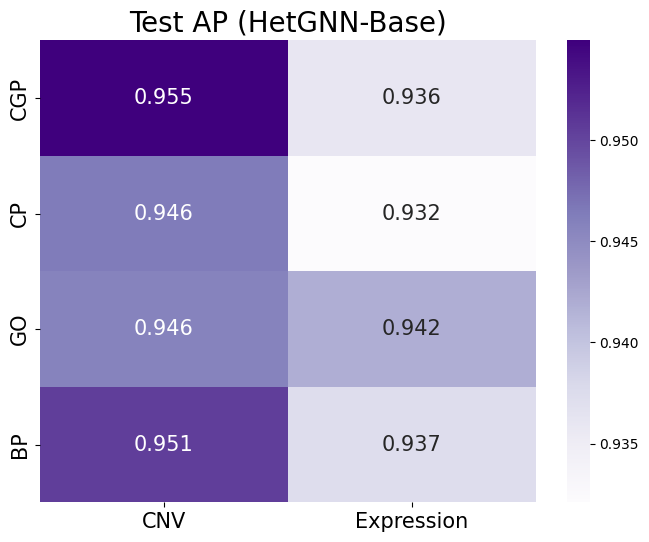

In [20]:
#2.3.2	Contribution of Features
testAP_df.rename_axis(None, inplace=True)
plt.figure(figsize=(8, 6))  # You can adjust the dimensions as needed

heatmap = sns.heatmap(testAP_df[['CNV','Expression']],annot=True, fmt='.3f',cmap='Purples',annot_kws={"size": 15})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
plt.title('Test AP (HetGNN-Base)', fontsize=20)
plt.show()

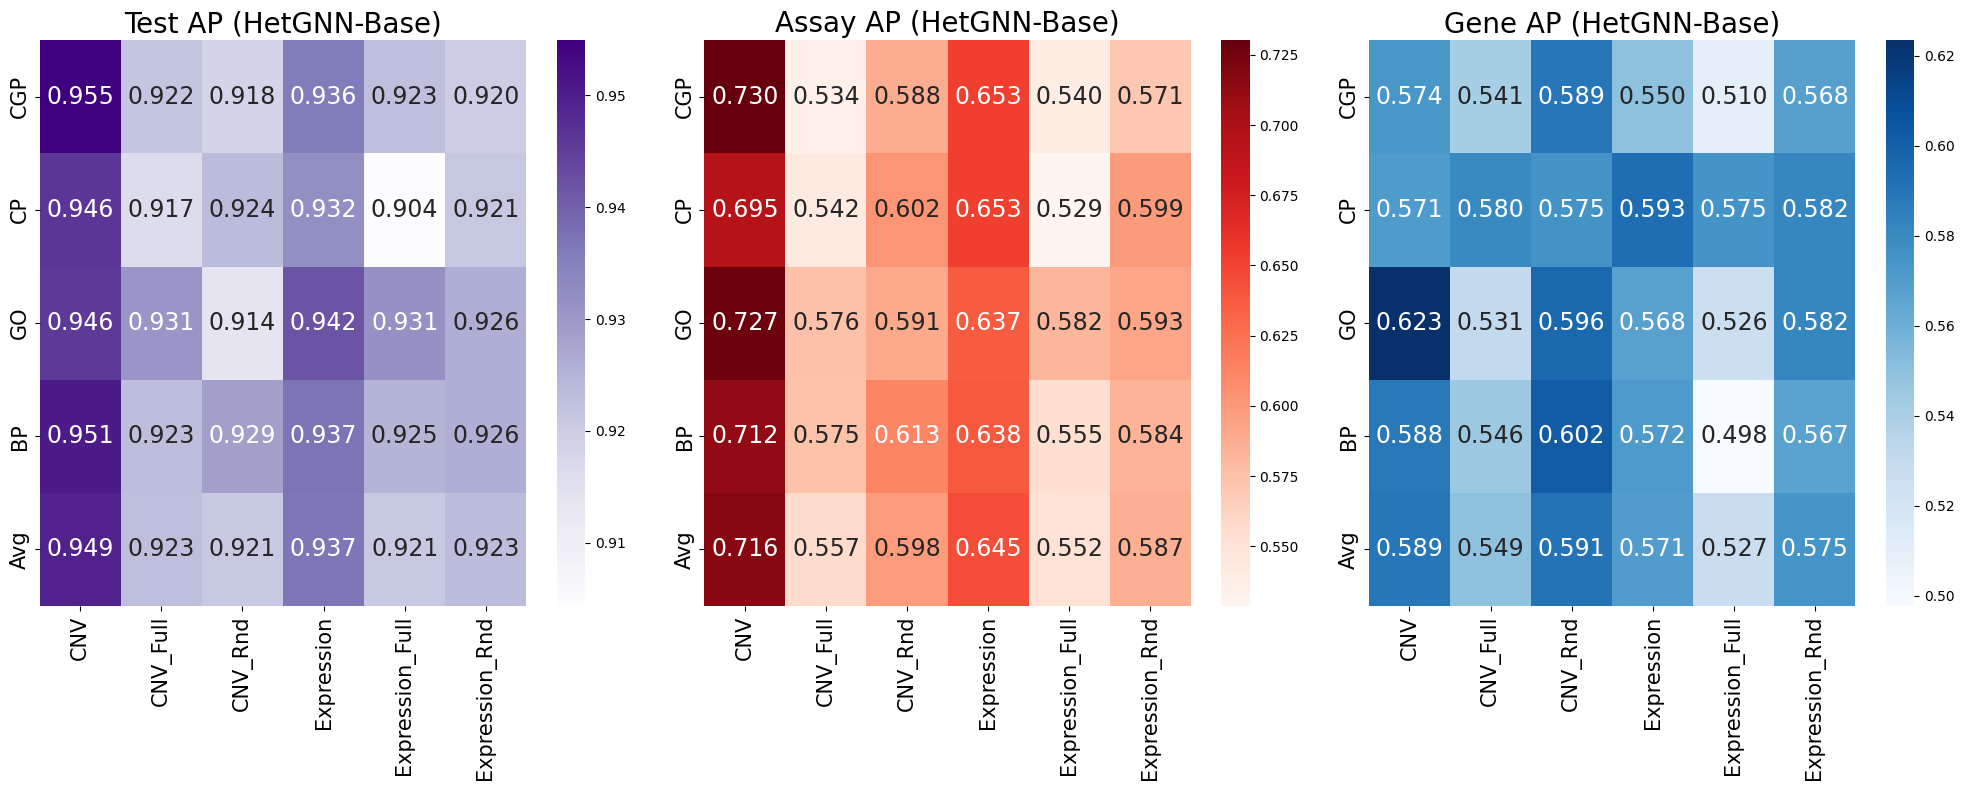

In [38]:
# 2.3.3
AssayAP_df.rename_axis(None, inplace=True)
GeneAP_df.rename_axis(None, inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(20, 8))  

# Test AP
heatmap1 = sns.heatmap(mean_cal(testAP_df[['CNV', 'CNV_Full','CNV_Rnd', 'Expression', 'Expression_Full', 'Expression_Rnd']]),
            annot=True, fmt='.3f', cmap='Purples', annot_kws={"size": 17}, ax=axes[0])
heatmap1.set_xticklabels(heatmap1.get_xticklabels(), fontsize=15)
heatmap1.set_yticklabels(heatmap1.get_yticklabels(), fontsize=15)
axes[0].set_title('Test AP (HetGNN-Base)', fontsize=20)

# Assay AP
heatmap2 = sns.heatmap(mean_cal(AssayAP_df[['CNV', 'CNV_Full','CNV_Rnd', 'Expression', 'Expression_Full', 'Expression_Rnd']]),
            annot=True, fmt='.3f', cmap='Reds', annot_kws={"size": 17}, ax=axes[1])
heatmap2.set_xticklabels(heatmap2.get_xticklabels(), fontsize=15)
heatmap2.set_yticklabels(heatmap2.get_yticklabels(), fontsize=15)
axes[1].set_title('Assay AP (HetGNN-Base)', fontsize=20)

# Gene AP
heatmap3 = sns.heatmap(mean_cal(GeneAP_df[['CNV', 'CNV_Full','CNV_Rnd', 'Expression', 'Expression_Full', 'Expression_Rnd']]),
            annot=True, fmt='.3f', cmap='Blues', annot_kws={"size": 17}, ax=axes[2])
heatmap3.set_xticklabels(heatmap3.get_xticklabels(), fontsize=15)
heatmap3.set_yticklabels(heatmap3.get_yticklabels(), fontsize=15)
axes[2].set_title('Gene AP (HetGNN-Base)', fontsize=20)

plt.tight_layout() 
plt.show()

In [29]:
#2.3.3	Cell Feature Validation
Cell_Empty_testAP_df.mean()
Cell_Empty_AssayAP_df.mean()

cell_feat
Cell_Empty    0.768958
dtype: float64

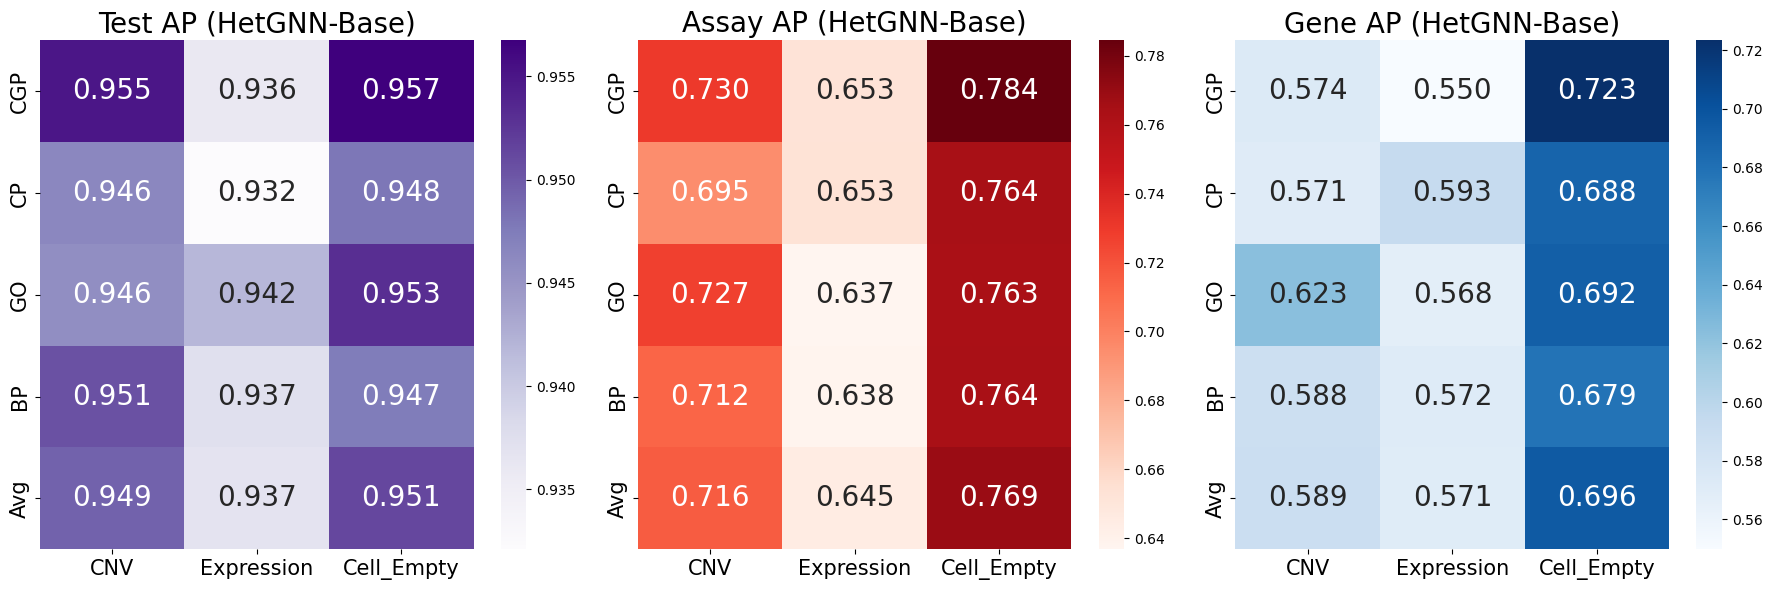

In [37]:
#2.3.3	Cell Feature Validation
AssayAP_df.rename_axis(None, inplace=True)
GeneAP_df.rename_axis(None, inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

# Test AP
heatmap1 = sns.heatmap(mean_cal(pd.concat([testAP_df[['CNV','Expression']], Cell_Empty_testAP_df], axis=1)),
            annot=True, fmt='.3f', cmap='Purples', annot_kws={"size": 20}, ax=axes[0])
heatmap1.set_xticklabels(heatmap1.get_xticklabels(), fontsize=15)
heatmap1.set_yticklabels(heatmap1.get_yticklabels(), fontsize=15)
axes[0].set_title('Test AP (HetGNN-Base)', fontsize=20)

# Assay AP
heatmap2 = sns.heatmap(mean_cal(pd.concat([AssayAP_df[['CNV','Expression']], Cell_Empty_AssayAP_df], axis=1)),
            annot=True, fmt='.3f', cmap='Reds', annot_kws={"size": 20}, ax=axes[1])
heatmap2.set_xticklabels(heatmap2.get_xticklabels(), fontsize=15)
heatmap2.set_yticklabels(heatmap2.get_yticklabels(), fontsize=15)
axes[1].set_title('Assay AP (HetGNN-Base)', fontsize=20)

# Gene AP
heatmap3 = sns.heatmap(mean_cal(pd.concat([GeneAP_df[['CNV','Expression']], Cell_Empty_GeneAP_df], axis=1)),
            annot=True, fmt='.3f', cmap='Blues', annot_kws={"size": 20}, ax=axes[2])
heatmap3.set_xticklabels(heatmap3.get_xticklabels(), fontsize=15)
heatmap3.set_yticklabels(heatmap3.get_yticklabels(), fontsize=15)
axes[2].set_title('Gene AP (HetGNN-Base)', fontsize=20)

plt.tight_layout() 
plt.show()

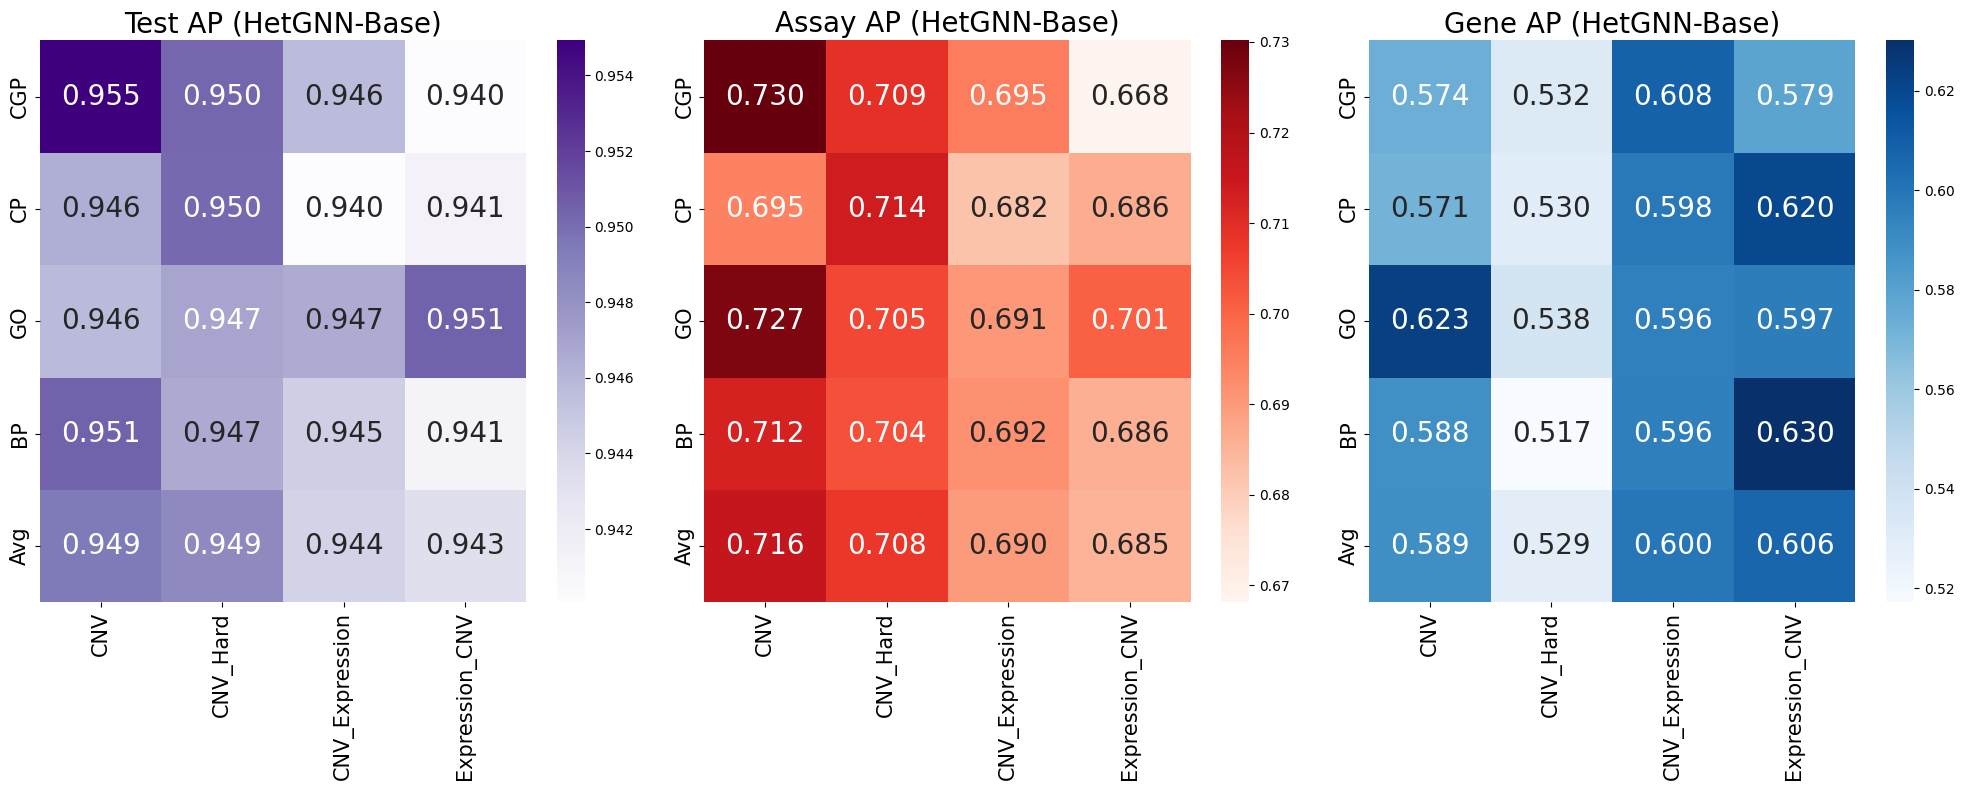

In [44]:
# 2.3.3	Cell Feature Variation

fig, axes = plt.subplots(1, 3, figsize=(20, 8))  

# Test AP
heatmap1 = sns.heatmap(mean_cal(testAP_df[['CNV','CNV_Hard','CNV_Expression','Expression_CNV']]),
            annot=True, fmt='.3f', cmap='Purples', annot_kws={"size": 20}, ax=axes[0])
heatmap1.set_xticklabels(heatmap1.get_xticklabels(), fontsize=15)
heatmap1.set_yticklabels(heatmap1.get_yticklabels(), fontsize=15)
axes[0].set_title('Test AP (HetGNN-Base)', fontsize=20)

# Assay AP
heatmap2 = sns.heatmap(mean_cal(AssayAP_df[['CNV','CNV_Hard','CNV_Expression','Expression_CNV']]),
            annot=True, fmt='.3f', cmap='Reds', annot_kws={"size": 20}, ax=axes[1])
heatmap2.set_xticklabels(heatmap2.get_xticklabels(), fontsize=15)
heatmap2.set_yticklabels(heatmap2.get_yticklabels(), fontsize=15)
axes[1].set_title('Assay AP (HetGNN-Base)', fontsize=20)

# Gene AP
heatmap3 = sns.heatmap(mean_cal(GeneAP_df[['CNV','CNV_Hard','CNV_Expression','Expression_CNV']]),
            annot=True, fmt='.3f', cmap='Blues', annot_kws={"size": 20}, ax=axes[2])
heatmap3.set_xticklabels(heatmap3.get_xticklabels(), fontsize=15)
heatmap3.set_yticklabels(heatmap3.get_yticklabels(), fontsize=15)
axes[2].set_title('Gene AP (HetGNN-Base)', fontsize=20)
plt.tight_layout() 
plt.show()

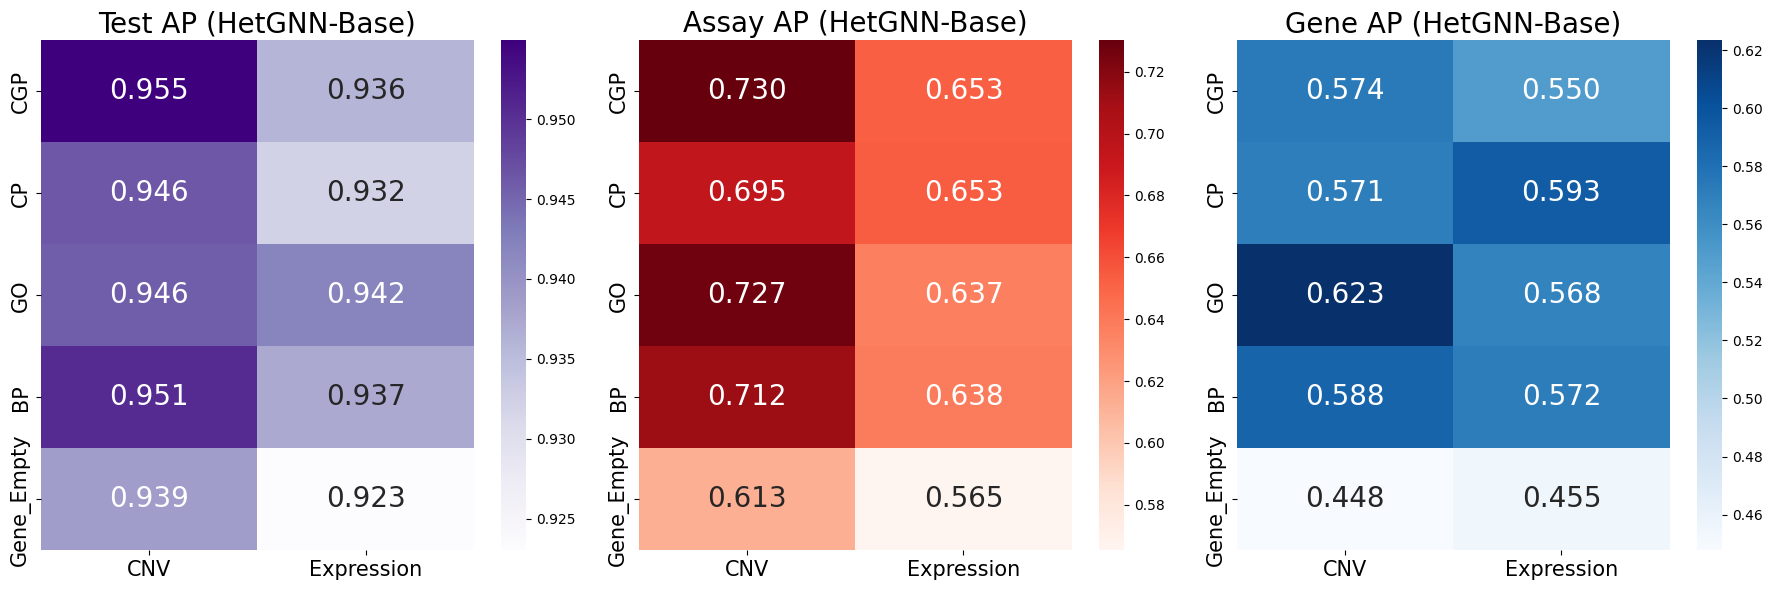

In [39]:
# 2.3.4	Gene Feature Validation
Gene_Empty_testAP_df.rename_axis(None, inplace=True)
Gene_Empty_AssayAP_df.rename_axis(None, inplace=True)
Gene_Empty_GeneAP_df.rename_axis(None, inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 

# Test AP
heatmap1 = sns.heatmap(pd.concat([testAP_df[['CNV', 'Expression']], Gene_Empty_testAP_df[['CNV', 'Expression']]], axis=0),
            annot=True, fmt='.3f', cmap='Purples', annot_kws={"size": 20}, ax=axes[0])
heatmap1.set_xticklabels(heatmap1.get_xticklabels(), fontsize=15)
heatmap1.set_yticklabels(heatmap1.get_yticklabels(), fontsize=15)
axes[0].set_title('Test AP (HetGNN-Base)', fontsize=20)

# Assay AP
heatmap2 = sns.heatmap(pd.concat([AssayAP_df[['CNV', 'Expression']], Gene_Empty_AssayAP_df[['CNV', 'Expression']]], axis=0),
            annot=True, fmt='.3f', cmap='Reds', annot_kws={"size": 20}, ax=axes[1])
heatmap2.set_xticklabels(heatmap2.get_xticklabels(), fontsize=15)
heatmap2.set_yticklabels(heatmap2.get_yticklabels(), fontsize=15)
axes[1].set_title('Assay AP (HetGNN-Base)', fontsize=20)

# 세 번째 히트맵: Gene AP
heatmap3 = sns.heatmap(pd.concat([GeneAP_df[['CNV', 'Expression']], Gene_Empty_GeneAP_df[['CNV', 'Expression']]], axis=0),
            annot=True, fmt='.3f', cmap='Blues', annot_kws={"size": 20}, ax=axes[2])
heatmap3.set_xticklabels(heatmap3.get_xticklabels(), fontsize=15)
heatmap3.set_yticklabels(heatmap3.get_yticklabels(), fontsize=15)
axes[2].set_title('Gene AP (HetGNN-Base)', fontsize=20)

plt.tight_layout()  

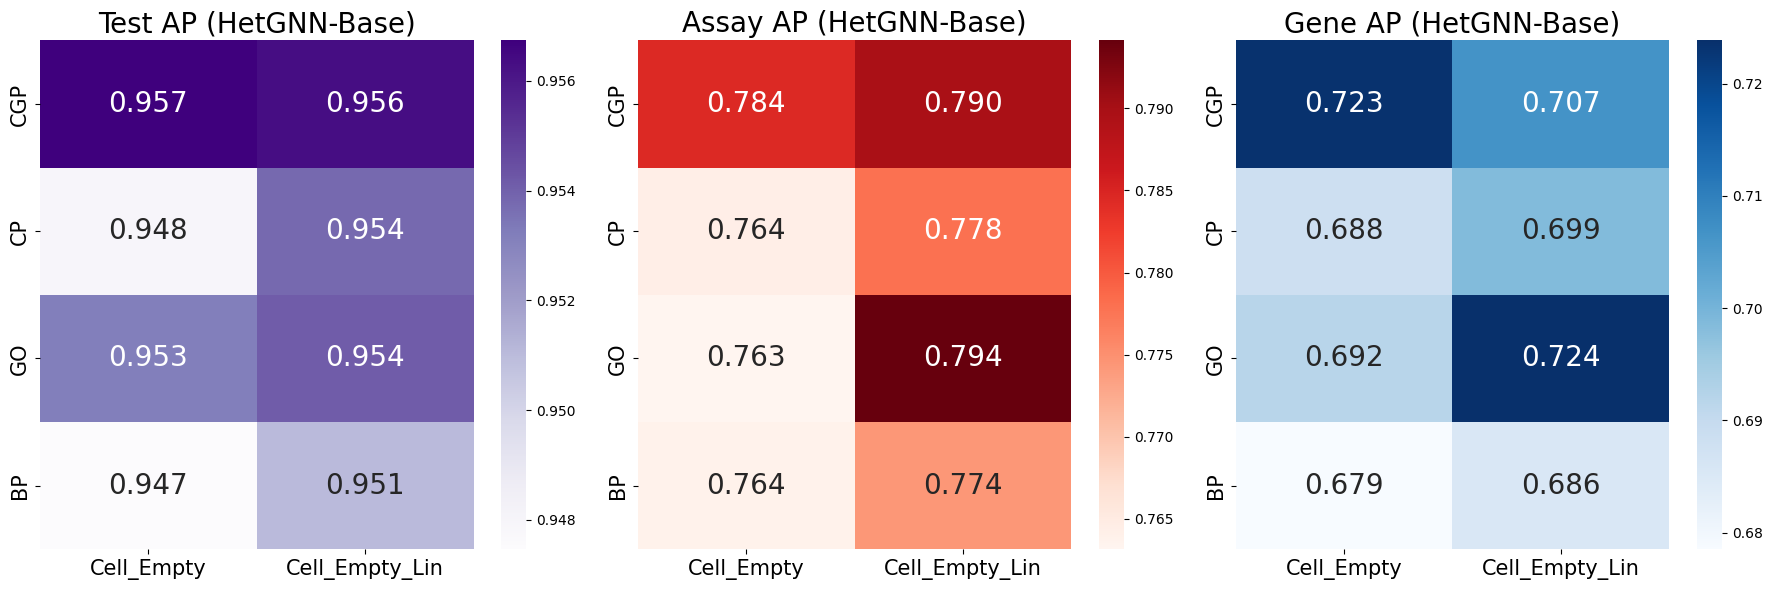

In [45]:
#2.4.1	Model Comparison 
Cell_Empty_testAP_df.rename_axis(None, inplace=True)
Cell_Empty_Lin_testAP_df.rename_axis(None, inplace=True)

Cell_Empty_AssayAP_df.rename_axis(None, inplace=True)
Cell_Empty_Lin_AssayAP_df.rename_axis(None, inplace=True)

Cell_Empty_GeneAP_df.rename_axis(None, inplace=True)
Cell_Empty_Lin_GeneAP_df.rename_axis(None, inplace=True)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

# Test AP
heatmap1 = sns.heatmap(pd.concat([Cell_Empty_testAP_df,Cell_Empty_Lin_testAP_df], axis=1),
            annot=True, fmt='.3f', cmap='Purples', annot_kws={"size": 20}, ax=axes[0])
heatmap1.set_xticklabels(heatmap1.get_xticklabels(), fontsize=15)
heatmap1.set_xlabel('')
heatmap1.set_yticklabels(heatmap1.get_yticklabels(), fontsize=15)
axes[0].set_title('Test AP (HetGNN-Base)', fontsize=20)

# Assay AP
heatmap2 = sns.heatmap(pd.concat([Cell_Empty_AssayAP_df, Cell_Empty_Lin_AssayAP_df], axis=1),
            annot=True, fmt='.3f', cmap='Reds', annot_kws={"size": 20}, ax=axes[1])
heatmap2.set_xticklabels(heatmap2.get_xticklabels(), fontsize=15)
heatmap2.set_xlabel('')
heatmap2.set_yticklabels(heatmap2.get_yticklabels(), fontsize=15)
axes[1].set_title('Assay AP (HetGNN-Base)', fontsize=20)

# Gene AP
heatmap3 = sns.heatmap(pd.concat([Cell_Empty_GeneAP_df, Cell_Empty_Lin_GeneAP_df], axis=1),
            annot=True, fmt='.3f', cmap='Blues', annot_kws={"size": 20}, ax=axes[2])
heatmap3.set_xticklabels(heatmap3.get_xticklabels(), fontsize=15)
heatmap3.set_xlabel('')
heatmap3.set_yticklabels(heatmap3.get_yticklabels(), fontsize=15)
axes[2].set_title('Gene AP (HetGNN-Base)', fontsize=20)

plt.tight_layout() 
plt.show()

# Stat Test

In [22]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import kruskal
from statsmodels.formula.api import ols

def Metlting(target):
    df = pd.read_csv('/Users/jihwanlim/Desktop/Final_Result/' + target+ '.csv')
    df_melted = pd.melt(df, id_vars='gene_feat', var_name='cell_feat', value_name='AP')

    return df_melted


def multigroup_test(df_melted):

    # gene_feat 별 ANOVA 실행
    model_gene = ols('AP ~ C(gene_feat)', data=df_melted).fit()
    anova_results_gene = sm.stats.anova_lm(model_gene, typ=2)

    # cell_feat 별 ANOVA 실행
    model_cell = ols('AP ~ C(cell_feat)', data=df_melted).fit()
    anova_results_cell = sm.stats.anova_lm(model_cell, typ=2)

    print(anova_results_gene)
    print(anova_results_cell)

    # Kruskal-Wallis Test for gene_feat
    gene_groups = [group['AP'].values for name, group in df_melted.groupby('gene_feat')]
    kruskal_results_gene = kruskal(*gene_groups)

    # Kruskal-Wallis Test for cell_feat
    cell_groups = [group['AP'].values for name, group in df_melted.groupby('cell_feat')]
    kruskal_results_cell = kruskal(*cell_groups)

    print("Kruskal-Wallis Test Results for gene_feat:", kruskal_results_gene)
    print("Kruskal-Wallis Test Results for cell_feat:", kruskal_results_cell)

In [23]:
#2.4.2
testAP_melted = Metlting('testAP')
AssayAP_melted = Metlting('AssayAP')
GeneAP_melted = Metlting('GeneAP')
#multigroup_test()

In [25]:
#2.3.2
cnv_exp = testAP_melted[testAP_melted['cell_feat'].isin( ['CNV', 'Expression'])]
multigroup_test(cnv_exp)

                sum_sq   df         F    PR(>F)
C(gene_feat)  0.000043  3.0  0.150855  0.923929
Residual      0.000378  4.0       NaN       NaN
                sum_sq   df          F    PR(>F)
C(cell_feat)  0.000318  1.0  18.596473  0.005024
Residual      0.000103  6.0        NaN       NaN
Kruskal-Wallis Test Results for gene_feat: KruskalResult(statistic=0.5, pvalue=0.9188914116546758)
Kruskal-Wallis Test Results for cell_feat: KruskalResult(statistic=5.333333333333329, pvalue=0.020921335337794052)


In [23]:
new = GeneAP_melted[GeneAP_melted['cell_feat'].isin( ['CNV', 'Expression_CNV','CNV_Expression'])]
multigroup_test(new)

                sum_sq   df         F    PR(>F)
C(gene_feat)  0.000676  3.0  0.532227  0.672847
Residual      0.003389  8.0       NaN       NaN
                sum_sq   df         F    PR(>F)
C(cell_feat)  0.000607  2.0  0.789325  0.483231
Residual      0.003459  9.0       NaN       NaN
Kruskal-Wallis Test Results for gene_feat: KruskalResult(statistic=1.2564102564102626, pvalue=0.7395089774047956)
Kruskal-Wallis Test Results for cell_feat: KruskalResult(statistic=2.0, pvalue=0.36787944117144245)


In [16]:
Cell_Empty_testAP_melted = Metlting('Cell_Empty_testAP')
Cell_Empty_AssayAP_melted = Metlting('Cell_Empty_AssayAP')
Cell_Empty_GeneAP_melted = Metlting('Cell_Empty_GeneAP')

In [32]:
from scipy.stats import shapiro
from scipy.stats import ttest_ind, mannwhitneyu

def twogroup_Test(df, group1, group2):

    # 데이터에서 'cnv_expression'과 'expression_cnv' 값을 추출
    g1_data = df[df['cell_feat'] == group1]['AP']
    g2_data = df[df['cell_feat'] == group2]['AP']

    # 정규성 검사
    g1_normality = shapiro(g1_data)
    g2_normality = shapiro(g2_data)

    # t-test 또는 Mann-Whitney U 검정 실행
    if g1_normality.pvalue > 0.05 and g2_normality.pvalue > 0.05:
        # 두 데이터 모두 정규 분포를 따르면 t-test 실행
        from scipy.stats import ttest_ind
        test_result = ttest_ind(g1_data, g2_data, equal_var=False)  # equal_var=False for Welch's t-test
    else:
        # 정규 분포를 따르지 않으면 Mann-Whitney U 검정 실행
        from scipy.stats import mannwhitneyu
        test_result = mannwhitneyu(g1_data, g2_data)

    print(g1_normality,'\n', g2_normality, '\n', test_result)


twogroup_Test(testAP_melted,'CNV', 'CNV_Full')
twogroup_Test(testAP_melted,'CNV', 'CNV_Rnd')
twogroup_Test(testAP_melted,'Expression', 'Expression_Full')
twogroup_Test(testAP_melted,'Expression', 'Expression_Rnd')
twogroup_Test(testAP_melted,'CNV_Rnd', 'Expression_Rnd')

ShapiroResult(statistic=0.9043341279029846, pvalue=0.45290446281433105) 
 ShapiroResult(statistic=0.9710903167724609, pvalue=0.8482235670089722) 
 Ttest_indResult(statistic=7.258089289770836, pvalue=0.0005357143801723274)
ShapiroResult(statistic=0.9043341279029846, pvalue=0.45290446281433105) 
 ShapiroResult(statistic=0.9883142709732056, pvalue=0.9486817717552185) 
 Ttest_indResult(statistic=7.278663026845145, pvalue=0.0006764818797799705)
ShapiroResult(statistic=0.9875388145446777, pvalue=0.9445474743843079) 
 ShapiroResult(statistic=0.8826348185539246, pvalue=0.3500114977359772) 
 Ttest_indResult(statistic=2.563207843513663, pvalue=0.06727960904550039)
ShapiroResult(statistic=0.9875388145446777, pvalue=0.9445474743843079) 
 ShapiroResult(statistic=0.8087549805641174, pvalue=0.11887075752019882) 
 Ttest_indResult(statistic=5.315588834772543, pvalue=0.0022134295828533817)
ShapiroResult(statistic=0.9883142709732056, pvalue=0.9486817717552185) 
 ShapiroResult(statistic=0.8087549805641174

In [ ]:
twogroup_Test(pd.concat([testAP_melted,Cell_Empty_testAP_melted],axis=0),'CNV','Cell_Empty')

In [18]:
twogroup_Test(testAP_melted,'CNV_Expression', 'Expression_CNV')
twogroup_Test(AssayAP_melted,'CNV_Expression', 'Expression_CNV')
twogroup_Test(GeneAP_melted,'CNV_Expression', 'Expression_CNV')

ShapiroResult(statistic=0.8662761449813843, pvalue=0.2833264172077179) 
 ShapiroResult(statistic=0.723971962928772, pvalue=0.021347172558307648) 
 MannwhitneyuResult(statistic=9.0, pvalue=0.8857142857142857)
ShapiroResult(statistic=0.9201875329017639, pvalue=0.5379989743232727) 
 ShapiroResult(statistic=0.9434425234794617, pvalue=0.6754252314567566) 
 Ttest_indResult(statistic=0.6388631933261182, pvalue=0.5574805311692148)
ShapiroResult(statistic=0.7871546149253845, pvalue=0.08110877871513367) 
 ShapiroResult(statistic=0.958867073059082, pvalue=0.7717795372009277) 
 Ttest_indResult(statistic=-0.5687728495890988, pvalue=0.6048500016974218)


In [22]:
twogroup_Test(testAP_melted,'CNV', 'CNV_Expression')
twogroup_Test(AssayAP_melted,'CNV', 'CNV_Expression')
twogroup_Test(GeneAP_melted,'CNV', 'CNV_Expression')

ShapiroResult(statistic=0.9043341279029846, pvalue=0.45290446281433105) 
 ShapiroResult(statistic=0.8662761449813843, pvalue=0.2833264172077179) 
 Ttest_indResult(statistic=2.014615039372339, pvalue=0.096777173836453)
ShapiroResult(statistic=0.9099113941192627, pvalue=0.48193272948265076) 
 ShapiroResult(statistic=0.9201875329017639, pvalue=0.5379989743232727) 
 Ttest_indResult(statistic=3.0318418052670184, pvalue=0.042854573659341706)
ShapiroResult(statistic=0.8460709452629089, pvalue=0.21368922293186188) 
 ShapiroResult(statistic=0.7871546149253845, pvalue=0.08110877871513367) 
 Ttest_indResult(statistic=-0.8434745904364945, pvalue=0.4545595826028509)


In [47]:
twogroup_Test(testAP_melted,'CNV', 'CNV_Hard')
twogroup_Test(AssayAP_melted,'CNV', 'CNV_Hard')
twogroup_Test(GeneAP_melted,'CNV', 'CNV_Hard')

ShapiroResult(statistic=0.9043341279029846, pvalue=0.45290446281433105) 
 ShapiroResult(statistic=0.7758017778396606, pvalue=0.06543298810720444) 
 Ttest_indResult(statistic=0.37783996627638766, pvalue=0.7236385604331715)
ShapiroResult(statistic=0.9099113941192627, pvalue=0.48193272948265076) 
 ShapiroResult(statistic=0.9383841156959534, pvalue=0.644498348236084) 
 Ttest_indResult(statistic=0.9723789453269667, pvalue=0.39355583464462013)
ShapiroResult(statistic=0.8460709452629089, pvalue=0.21368922293186188) 
 ShapiroResult(statistic=0.9224842190742493, pvalue=0.5509622693061829) 
 Ttest_indResult(statistic=4.65305557419137, pvalue=0.011081990527312395)
